In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import tqdm
import numpy as np
import utils
import dataloaders
import torchvision
from trainer import Trainer
torch.random.manual_seed(0)
np.random.seed(0)

### Dataset

In [2]:
# Load the dataset and print some stats
batch_size = 64

image_transform = torchvision.transforms.Compose([
    torchvision.transforms.ToTensor(),
])

dataloader_train, dataloader_test = dataloaders.load_dataset(batch_size, image_transform)
example_images, _ = next(iter(dataloader_train))
print(f"The tensor containing the images has shape: {example_images.shape} (batch size, number of color channels, height, width)",
      f"The maximum value in the image is {example_images.max()}, minimum: {example_images.min()}", sep="\n\t")

100%|██████████| 9912422/9912422 [00:00<00:00, 15854026.95it/s]


Extracting data/MNIST\raw\train-images-idx3-ubyte.gz to data/MNIST\raw



100%|██████████| 28881/28881 [00:00<?, ?it/s]


Extracting data/MNIST\raw\train-labels-idx1-ubyte.gz to data/MNIST\raw



100%|██████████| 1648877/1648877 [00:00<00:00, 14296416.32it/s]


Extracting data/MNIST\raw\t10k-images-idx3-ubyte.gz to data/MNIST\raw



100%|██████████| 4542/4542 [00:00<?, ?it/s]


Extracting data/MNIST\raw\t10k-labels-idx1-ubyte.gz to data/MNIST\raw

The tensor containing the images has shape: torch.Size([64, 1, 28, 28]) (batch size, number of color channels, height, width)
	The maximum value in the image is 1.0, minimum: 0.0


In [18]:
def create_model():
    """
        Initializes the mode. Edit the code below if you would like to change the model.
    """
    model = nn.Sequential(
        nn.Flatten(), # Flattens the image from shape (batch_size, C, Height, width) to (batch_size, C*height*width)
        nn.Linear(28*28*1, 10)
        # No need to include softmax, as this is already combined in the loss function
    )
    # Transfer model to GPU memory if a GPU is available
    model = utils.to_cuda(model)
    return model


model = create_model()

In [19]:
# Test if the model is able to do a single forward pass
example_images = utils.to_cuda(example_images)
output = model(example_images)
print("Output shape:", output.shape)
expected_shape = (batch_size, 10) # 10 since mnist has 10 different classes
assert output.shape == expected_shape,    f"Expected shape: {expected_shape}, but got: {output.shape}"

Output shape: torch.Size([64, 10])


### Hyperparameters & Loss function

In [20]:
# Hyperparameters
learning_rate = .0192
num_epochs = 5


# Use CrossEntropyLoss for multi-class classification
loss_function = torch.nn.CrossEntropyLoss()

# Define optimizer (Stochastic Gradient Descent)
optimizer = torch.optim.SGD(model.parameters(),
                            lr=learning_rate)

### Train model

In [21]:
trainer = Trainer(
  model=model,
  dataloader_train=dataloader_train,
  dataloader_test=dataloader_test,
  batch_size=batch_size,
  loss_function=loss_function,
  optimizer=optimizer
)
train_loss_dict, test_loss_dict = trainer.train(num_epochs)

Training epoch 4: 100%|██████████| 938/938 [00:13<00:00, 67.84it/s]


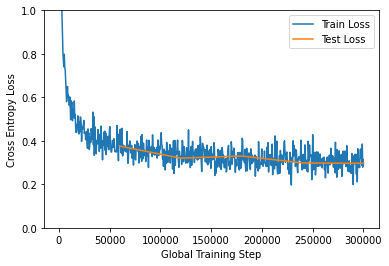

Final Test loss: 0.29668554314857076. Final Test accuracy: 0.9158


In [22]:
# We can now plot the training loss with our utility script

# Plot loss
train_loss_dict0 = train_loss_dict
test_loss_dict0 = test_loss_dict
utils.plot_loss(train_loss_dict0, label="Train Loss")
utils.plot_loss(test_loss_dict0, label="Test Loss")



# Limit the y-axis of the plot (The range should not be increased!)
plt.ylim([0, 1])
plt.legend()
plt.xlabel("Global Training Step")
plt.ylabel("Cross Entropy Loss")
plt.savefig("image_solutions/task_4a.png")

plt.show()

torch.save(model.state_dict(), "saved_model.torch")
final_loss, final_acc = utils.compute_loss_and_accuracy(
    dataloader_test, model, loss_function)
print(f"Final Test loss: {final_loss}. Final Test accuracy: {final_acc}")

## Plotting example

In [8]:
# You can delete the remaining code of this notebook, as this is just to illustrate one method to solve the assignment tasks.


# This example code is here to illustrate how you can plot two different models to compare them.
# Lets change a small part of our model: the number of epochs trained (NOTE, use 5 epochs for your experiments in the assignment.)

# We reset the manual seed to 0, such that the model parameters are initialized with the same random number generator.
torch.random.manual_seed(0)
np.random.seed(0)


dataloader_train, dataloader_test = dataloaders.load_dataset(batch_size, image_transform)
model = create_model()

learning_rate = .0192
num_epochs = 6

# Redefine optimizer, as we have a new model.
optimizer = torch.optim.SGD(model.parameters(),
                            lr=learning_rate)
trainer = Trainer(
  model=model,
  dataloader_train=dataloader_train,
  dataloader_test=dataloader_test,
  batch_size=batch_size,
  loss_function=loss_function,
  optimizer=optimizer
)
train_loss_dict_6epochs, test_loss_dict_6epochs = trainer.train(num_epochs)
num_epochs = 5

Training epoch 5: 100%|██████████| 938/938 [00:09<00:00, 98.63it/s] 


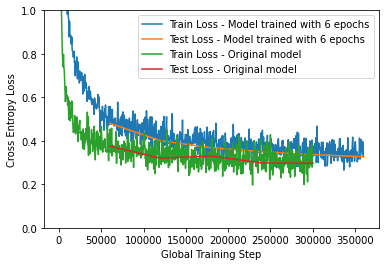

Final Test loss: 0.29668554314857076. Final Test accuracy: 0.9158


In [23]:
# We can now plot the two models against eachother

# Plot loss
utils.plot_loss(train_loss_dict_6epochs, label="Train Loss - Model trained with 6 epochs")
utils.plot_loss(test_loss_dict_6epochs, label="Test Loss - Model trained with 6 epochs")
utils.plot_loss(train_loss_dict, label="Train Loss - Original model")
utils.plot_loss(test_loss_dict, label="Test Loss - Original model")
# Limit the y-axis of the plot (The range should not be increased!)
plt.ylim([0, 1])
plt.legend()
plt.xlabel("Global Training Step")
plt.ylabel("Cross Entropy Loss")
plt.savefig("image_solutions/task_4a.png")

plt.show()

torch.save(model.state_dict(), "saved_model.torch")
final_loss, final_acc = utils.compute_loss_and_accuracy(
    dataloader_test, model, loss_function)
print(f"Final Test loss: {final_loss}. Final Test accuracy: {final_acc}")

### Task A

In [54]:
# Load the dataset and print some stats
batch_size = 64

image_transform_norm = torchvision.transforms.Compose([
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize(mean=0.5, std=0.5)
])

image_transform = torchvision.transforms.Compose([
    torchvision.transforms.ToTensor(),
])

dataloader_train, dataloader_test = dataloaders.load_dataset(batch_size, image_transform)
example_images, _ = next(iter(dataloader_train))
print(f"The tensor containing the images has shape: {example_images.shape} (batch size, number of color channels, height, width)",
      f"The maximum value in the image is {example_images.max()}, minimum: {example_images.min()}", sep="\n\t")

print("\n")
dataloader_train_norm, dataloader_test_norm = dataloaders.load_dataset(batch_size, image_transform_norm)
example_images_norm, _ = next(iter(dataloader_train_norm))
print(f"The tensor containing the norm images has shape: {example_images_norm.shape} (batch size, number of color channels, height, width)",
      f"The maximum value in the norm image is {example_images_norm.max()}, minimum: {example_images_norm.min()}", sep="\n\t")

The tensor containing the images has shape: torch.Size([64, 1, 28, 28]) (batch size, number of color channels, height, width)
	The maximum value in the image is 1.0, minimum: 0.0


The tensor containing the norm images has shape: torch.Size([64, 1, 28, 28]) (batch size, number of color channels, height, width)
	The maximum value in the norm image is 1.0, minimum: -1.0


In [55]:
def create_model():
    """
        Initializes the mode. Edit the code below if you would like to change the model.
    """
    model = nn.Sequential(
        nn.Flatten(), # Flattens the image from shape (batch_size, C, Height, width) to (batch_size, C*height*width)
        nn.Linear(28*28*1, 10)
        # No need to include softmax, as this is already combined in the loss function
    )
    # Transfer model to GPU memory if a GPU is available
    model = utils.to_cuda(model)
    return model


model = create_model()
model_norm = create_model()


In [56]:
# Hyperparameters
learning_rate = .0192
num_epochs = 5


# Use CrossEntropyLoss for multi-class classification
loss_function = torch.nn.CrossEntropyLoss()

# Define optimizer (Stochastic Gradient Descent)
optimizer = torch.optim.SGD(model.parameters(),
                            lr=learning_rate)
optimizer_norm = torch.optim.SGD(model_norm.parameters(),
                    lr=learning_rate)

In [57]:
trainer = Trainer(
  model=model,
  dataloader_train=dataloader_train,
  dataloader_test=dataloader_test,
  batch_size=batch_size,
  loss_function=loss_function,
  optimizer=optimizer
)

trainer_norm = Trainer(
  model=model_norm,
  dataloader_train=dataloader_train_norm,
  dataloader_test=dataloader_test_norm,
  batch_size=batch_size,
  loss_function=loss_function,
  optimizer=optimizer_norm
)
train_loss_dict, test_loss_dict = trainer.train(num_epochs)
train_loss_dict_norm, test_loss_dict_norm = trainer_norm.train(num_epochs)

Training epoch 4: 100%|██████████| 938/938 [00:13<00:00, 70.50it/s]


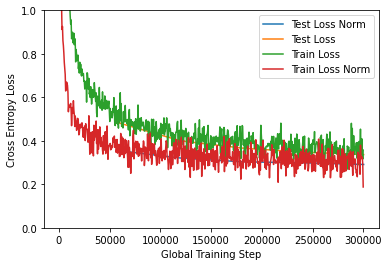

Final Test loss: 0.3366729109103133. Final Test accuracy: 0.908
Final Norm Test loss: 0.2912575654495674. Final Test accuracy: 0.9162


In [58]:
# We can now plot the training loss with our utility script

# Plot loss
utils.plot_loss(test_loss_dict_norm, label="Test Loss Norm")
utils.plot_loss(test_loss_dict, label="Test Loss")
utils.plot_loss(train_loss_dict, label="Train Loss")
utils.plot_loss(train_loss_dict_norm, label="Train Loss Norm")

# Limit the y-axis of the plot (The range should not be increased!)
plt.ylim([0, 1])
plt.legend()
plt.xlabel("Global Training Step")
plt.ylabel("Cross Entropy Loss")
plt.savefig("image_solutions/task_4a.png")

plt.show()

torch.save(model.state_dict(), "saved_mode1.torch")
final_loss, final_acc = utils.compute_loss_and_accuracy(
    dataloader_test, model, loss_function)
print(f"Final Test loss: {final_loss}. Final Test accuracy: {final_acc}")
torch.save(model_norm.state_dict(), "saved_mode2.torch")
final_loss_norm, final_acc_norm = utils.compute_loss_and_accuracy(
    dataloader_test_norm, model_norm, loss_function)
print(f"Final Norm Test loss: {final_loss_norm}. Final Test accuracy: {final_acc_norm}")

### Task B

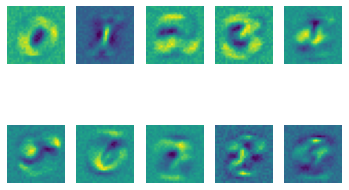

In [71]:
weight = list(model.children())[1].weight.cpu().data
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.axis("off")
    plt.imshow(weight[i].reshape(28, 28))
    plt.imsave("W_" + str(i) + ".png", weight[i].reshape(28, 28))

### Task C

In [72]:
model_lr_1 = create_model()
# Hyperparameters
learning_rate_1 = 1.
num_epochs = 5


# Use CrossEntropyLoss for multi-class classification
loss_function = torch.nn.CrossEntropyLoss()

# Define optimizer (Stochastic Gradient Descent)
optimizer_lr_1 = torch.optim.SGD(model_lr_1.parameters(),
                    lr=learning_rate_1)

In [73]:
trainer_lr_1 = Trainer(
  model=model_lr_1,
  dataloader_train=dataloader_train_norm,
  dataloader_test=dataloader_test_norm,
  batch_size=batch_size,
  loss_function=loss_function,
  optimizer=optimizer_lr_1
)

train_loss_dict_lr_1, test_loss_dict_lr_1 = trainer_lr_1.train(num_epochs)

Training epoch 4: 100%|██████████| 938/938 [00:16<00:00, 58.62it/s]


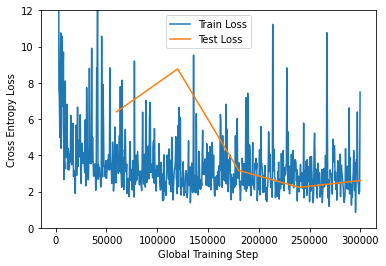

Final Test loss: 2.613247326931134. Final Test accuracy: 0.8772


In [77]:
# We can now plot the training loss with our utility script

# Plot loss
utils.plot_loss(train_loss_dict_lr_1, label="Train Loss")
utils.plot_loss(test_loss_dict_lr_1, label="Test Loss")

# Limit the y-axis of the plot (The range should not be increased!)
plt.ylim([0, 12])
plt.legend()
plt.xlabel("Global Training Step")
plt.ylabel("Cross Entropy Loss")
plt.savefig("image_solutions/task_4a.png")

plt.show()

torch.save(model_lr_1.state_dict(), "saved_mode1_lr_1.torch")
final_loss, final_acc = utils.compute_loss_and_accuracy(
    dataloader_test_norm, model_lr_1, loss_function)
print(f"Final Test loss: {final_loss}. Final Test accuracy: {final_acc}")

### Task D

In [79]:
def create_model_relu():
    """
        Initializes the mode. Edit the code below if you would like to change the model.
    """
    model = nn.Sequential(
        nn.Flatten(), # Flattens the image from shape (batch_size, C, Height, width) to (batch_size, C*height*width)
        nn.Linear(28*28*1, 64),
        nn.ReLU(),
        nn.Linear(64, 10),
        # No need to include softmax, as this is already combined in the loss function
    )
    # Transfer model to GPU memory if a GPU is available
    model = utils.to_cuda(model)
    return model


model_relu = create_model_relu()


In [80]:
# Use CrossEntropyLoss for multi-class classification
loss_function = torch.nn.CrossEntropyLoss()

# Define optimizer (Stochastic Gradient Descent)
optimizer_relu = torch.optim.SGD(model_relu.parameters(),
                    lr=learning_rate)

In [82]:
trainer_relu = Trainer(
  model=model_relu,
  dataloader_train=dataloader_train_norm,
  dataloader_test=dataloader_test_norm,
  batch_size=batch_size,
  loss_function=loss_function,
  optimizer=optimizer_relu
)

train_loss_dict_relu, test_loss_dict_relu = trainer_relu.train(num_epochs)

Training epoch 4: 100%|██████████| 938/938 [00:15<00:00, 61.72it/s]


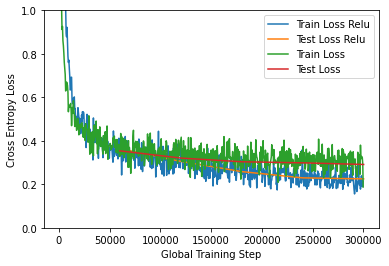

Final Test loss: 0.22498206255043957. Final Test accuracy: 0.935


In [85]:
# We can now plot the training loss with our utility script

# Plot loss
utils.plot_loss(train_loss_dict_relu, label="Train Loss Relu")
utils.plot_loss(test_loss_dict_relu, label="Test Loss Relu")
utils.plot_loss(train_loss_dict_norm, label="Train Loss")
utils.plot_loss(test_loss_dict_norm, label="Test Loss")

# Limit the y-axis of the plot (The range should not be increased!)
plt.ylim([0, 1])
plt.legend()
plt.xlabel("Global Training Step")
plt.ylabel("Cross Entropy Loss")
plt.savefig("image_solutions/task_4a.png")

plt.show()

torch.save(model_relu.state_dict(), "saved_mode1_relu.torch")
final_loss, final_acc = utils.compute_loss_and_accuracy(
    dataloader_test_norm, model_relu, loss_function)
print(f"Final Test loss: {final_loss}. Final Test accuracy: {final_acc}")